Load in the data:

In [2]:
# Read data
import numpy as np
import xlrd
import matplotlib
matplotlib.rcParams.update({'font.size': 7.5})

"""
Explanation of variables in dataset SAHD.xls (african heart disease)
chd: Coronary heart disease (bool (Actually its a string but its only used in the dictionary and as whether or not the subject has the disease)) 
sbp: Systolic blood pressure (int)
tobacco: tobacco in kg (float)
ldl: ? (float)
adiposity: ? (float)
famhist: Family history of CHD (bool (Present, Absent)) (string)
typea: ? (int)
obesity: ? (float)
alcohol: alcohol consumption in liters (float)
age: age (int)
"""

# Load xls sheet with data
doc = xlrd.open_workbook('Data/SAHD2.xls').sheet_by_index(0)
# Extract attribute names (1st row, column 4 to 12)
attributeNames = doc.row_values(0, 1, 10)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(0, 1, 463)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(2)))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((462, 9))
for i, col_id in enumerate(range(1,10)):
    X[:, i] = np.asarray(doc.col_values(col_id, 1, 463))
# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

print('Done')

Done


Print summary statistics:


In [3]:
import numpy as np
import sys
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#Using a library from a sub folder:
sys.path.append("02450_toolbox/Tools/toolbox_02450")
from similarity import similarity
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)

numrows = len(X)
numcols = len(X[0])

summaryStatistics = np.empty([4, numcols])
#Mean of X
summaryStatistics[0] =  X.mean(axis=0)
#STD of X
summaryStatistics[1] =  X.std(axis=0)
#Median of X
summaryStatistics[2] =  np.median(X,axis=0)
#Range of X
summaryStatistics[3] =  X.max(axis=0)-X.min(axis=0)
#Covariance

# This is no very usable so far:

# print(np.cov(summaryStatistics[0][0:2]))
# print(np.cov(summaryStatistics[0][1:3]))
# print(np.cov(summaryStatistics[0][2:4]))
# print(np.cov(summaryStatistics[0][3:5]))
# print(np.cov(summaryStatistics[0][4:6]))
# print(np.cov(summaryStatistics[0][5:7]))
# print(np.cov(summaryStatistics[0][6:8]))

# This is also not super usefull but it uses the built-in function from the similarity script in the toolbox folder.

#print(similarity(summaryStatistics[0][0:2], summaryStatistics[0][1:3], 'cos'))


print(summaryStatistics[:])

#Standardized dataset:
#We dont currently use this :)
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))

#Peasons correlation coefficient


#for i in range(0,len(attributeNames)-1):
#    corr,_ = pearsonr([row[i] for row in X], [row[i+1] for row in X])
#    print(f' Correlation between PC{i} and PC{i+1}: {corr}')


[[138.32683983   3.63564935   4.74032468  25.4067316    0.41558442  53.1038961   26.04411255  17.04439394  42.81601732]
 [ 20.474123     4.58805058   2.0686667    7.77227336   0.49282249   9.80690332   4.2091175   24.45454969  14.59313732]
 [134.           2.           4.34        26.115        0.          53.          25.805        7.51        45.        ]
 [117.          31.2         14.35        35.75         1.          65.          31.88       147.19        49.        ]]


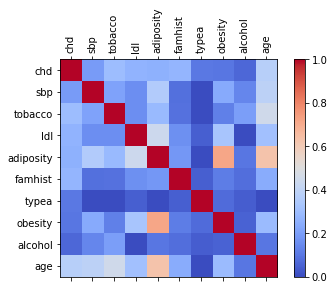

<function matplotlib.pyplot.show(close=None, block=None)>

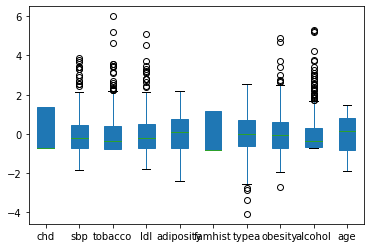

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
data = pd.read_excel('Data/SAHD2.xls')
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

"""
Explanation of variables in dataset SAHD.xls (african heart disease)
chd: Coronary heart disease (bool (Actually its a string but its only used in the dictionary and as whether or not the subject has the disease)) 
sbp: Systolic blood pressure (int)
tobacco: tobacco in kg (float)
ldl: ? (float)
adiposity: ? (float)
famhist: Family history of CHD (bool (Present, Absent)) (string)
typea: ? (int)
obesity: ? (float)
alcohol: alcohol consumption in liters (float)
age: age (int)
"""

df = pd.DataFrame(data)
normalized_df=(df-df.mean())/df.std()

fig = plt.figure()

norm_box = normalized_df.boxplot(vert=True, patch_artist = True)
#plt.subplots_adjust(left = 0.25)

plt.grid(False)

plt.show

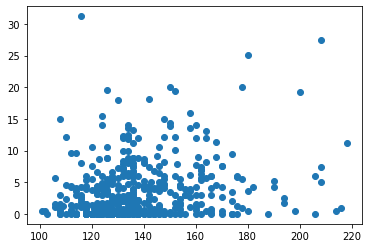

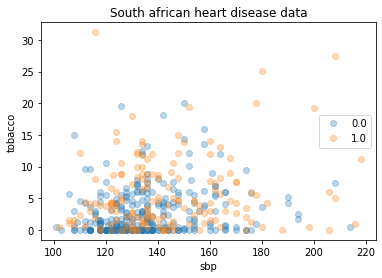

Done


In [5]:
"""
Created on Fri Oct  1 15:19:24 2021

@author: Bjart
"""
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show

# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) #Try to uncomment this line
plot(X[:, i], X[:, j], 'o')

# %%
# Make another more fancy plot that includes legend, class labels, 
# attribute names, and a title.
f = figure()
title('South african heart disease data')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()
print('Done')

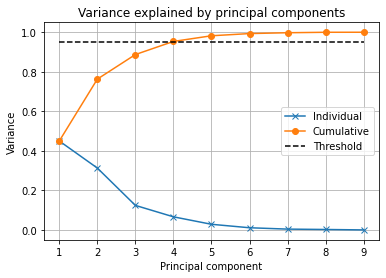

Done


In [6]:
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

print('Done')

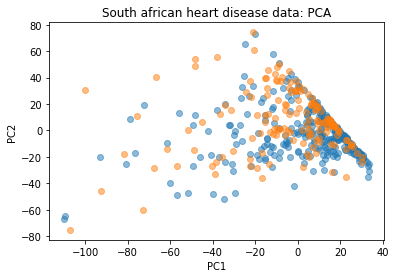

Ran Exercise 2.1.4


In [7]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('South african heart disease data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
#legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

print('Ran Exercise 2.1.4')

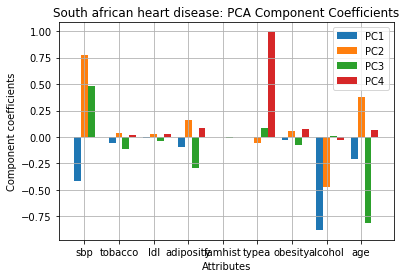

PC2:
[ 0.77384005  0.04182376  0.02444873  0.16375081  0.00218629 -0.05488391  0.05554242 -0.47593454  0.37335588]


In [8]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

Y = X - np.ones((N,1))*X.mean(0)
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('South african heart disease: PCA Component Coefficients')
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print('PC2:')
print(V[:,1].T)


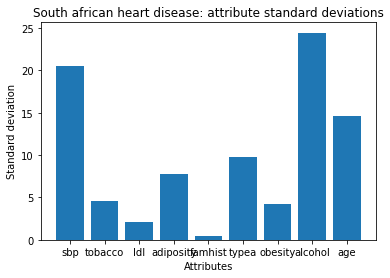

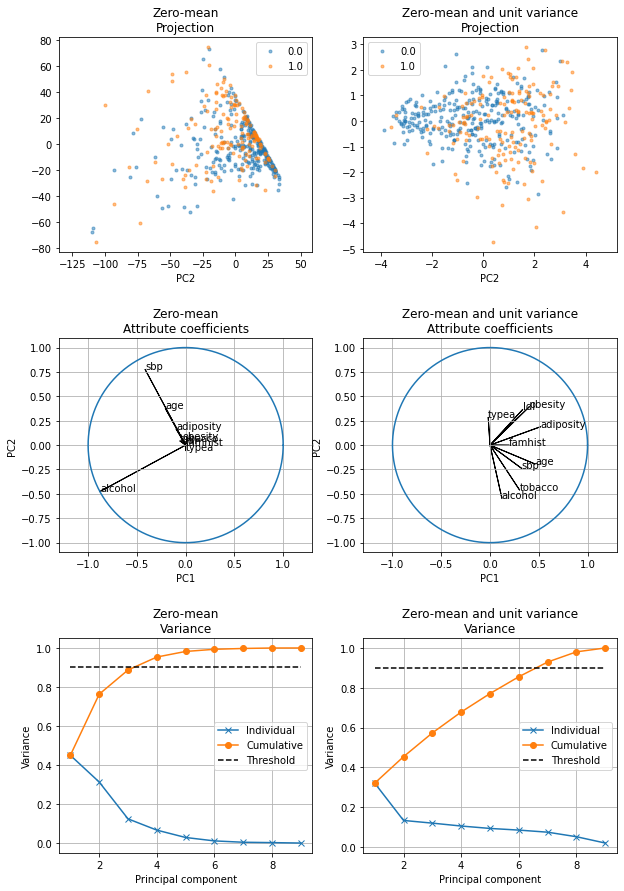

In [9]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('South african heart disease: attribute standard deviations')

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
#X_s = X.copy() # Make a to be "scaled" version of X
#X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('South african heart disease: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: 
        V = -V
        U = -U
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)))
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k)
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components')
    plt.xlabel('Principal component')
    plt.ylabel('Variance')
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance')

plt.show()
         

When looking at the zero mean scatter plots above we see very little useful data in the left one because this data has not been standardized, the reason we standardize our data is because when we do our Principal component analisys we make a line through the dataset which gives us the largest variance and the smallest error (We ofcourse do this recusively untill we have as many principal components as we have variables in the dataset) and if the data is not standardized one variable might be between 0 and 2000 and another between 1 and 10 the variable between 0 and 2000 will ofcourse have a much larger variance than the other one and our PCA will assume that this variable says much more about our data set than the other, which would be an incorrect assumption. This is also evident in the third plot down where the cumulative variance of each principal component is plotted, on the left PCA thinks that the first line it draws through the data set explains around 45% of the dataset and the next 75%, but if we look at the standardized data to the right we can see that in the first PC we actually only explain around 35% (Which is still alot) of the variance in the dataset. This inequality in the variance in the dataset can also easily be seen in the middle plot where it is obvious that in the left one sbp, alcohol and age are vastly more important for describing the variance, than any of the other data. But if we look on the right we can see a much better split of variance between the different variables.

But even after having standardized the data in the right scatterplot we cant see much about the data other than the fact that it is sort of starting to split into 2 groups, and we know that in PCA, groupings of data shows correlation in the data, but the groupings here are still way too loose to determine anything, we definietly need more PC's to explain any differences between the absence or presence of the coronary heart disease based on the variables.



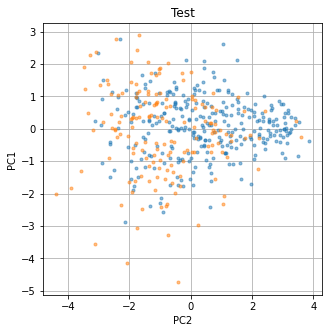

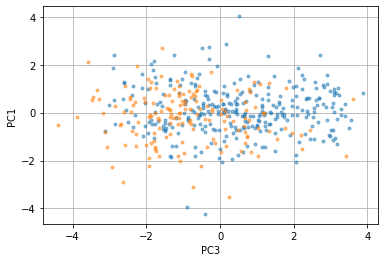

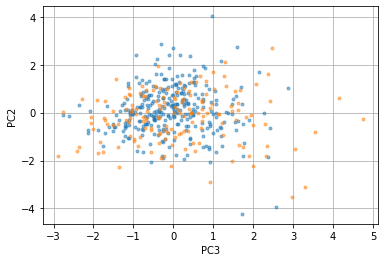

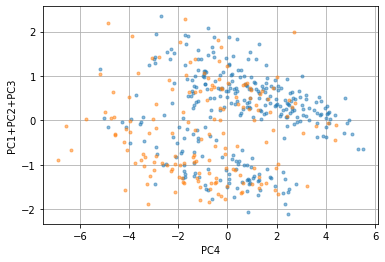

In [10]:
# Plot pc1 vs pc2 and pc1 vs pc3:
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Make the plot
plt.figure(figsize=(5,5))
plt.title('Test')
# Obtain the PCA solution by calculate the SVD of either Y1 or Y2
U2,S2,Vh2 = svd(Y2,full_matrices=False)
V2=Vh2.T # For the direction of V to fit the convention in the course we transpose

# Compute variance explained
rho2 = (S2*S2) / (S2*S2).sum() 

# Compute the projection onto the principal components
Z2 = U2*S2

C = len(classNames)
for c in range(C):
    plt.plot(Z2[y==c,0], Z[y==c,1], '.', alpha=.5)
#plt.xlim([-1,1])
#plt.ylim([-1,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.grid()
plt.show()
for c in range(C):
    plt.plot(Z2[y==c,0], Z[y==c,2], '.', alpha=.5)
#plt.xlim([-1,1])
#plt.ylim([-1,1])
plt.ylabel('PC1')
plt.xlabel('PC3')
plt.grid()
plt.show()
for c in range(C):
    plt.plot(Z2[y==c,1], Z[y==c,2], '.', alpha=.5)
#plt.xlim([-1,1])
#plt.ylim([-1,1])
plt.ylabel('PC2')
plt.xlabel('PC3')
plt.grid()
plt.show()

for c in range(C):
    plt.plot(Z2[y==c,0]+Z2[y==c,1]+Z[y==c,2], Z[y==c,3], '.', alpha=.5)
#plt.xlim([-1,1])
#plt.ylim([-1,1])
plt.ylabel('PC1+PC2+PC3')
plt.xlabel('PC4')
plt.grid()
plt.show()